# Case Study: Palladium Catalyzed AAA reactions 
#### Goal: Test if k-means clustering provides clusters that can be linearly modelled

In [30]:
import sys

import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 16})


sys.path.append('../src')
from prepare_dataset import prepare_dataset

### Dataset preparation
read in data

In [2]:
df = prepare_dataset('../data/Palladium_Database.xlsx')

In [3]:
df_train, df_test = train_test_split(df,test_size=0.1, random_state=25)

X_train = df_train.iloc[:,6:]
X_test = df_test.iloc[:,6:]
y_train = df_train['DDG'].values
y_test = df_test['DDG'].values

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Elbow method and silhouette method to determine optimal number of clusters

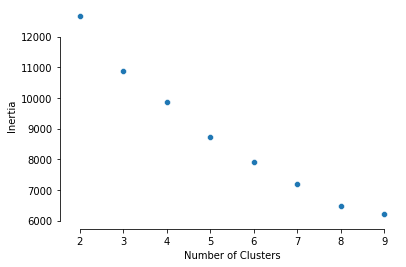

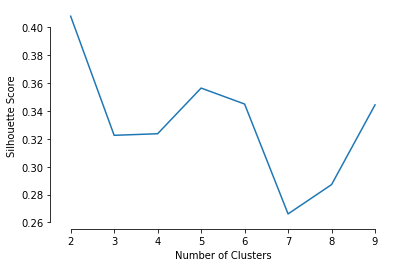

In [4]:
inertia = []
silhouette = []
for cluster in range(2,10):
    clusterer = KMeans(n_clusters=cluster).fit(X_train_scaled)
    inertia.append(clusterer.inertia_)
    silhouette.append(silhouette_score(X_train_scaled,clusterer.labels_))


sns.scatterplot(x=range(2,10),y=inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2,10))
sns.despine(offset=5, trim=True)
plt.show()

sns.lineplot(x=range(2,10),y=silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2,10))
sns.despine(offset=5, trim=True)
plt.show()


### Apply k-means clustering

In [5]:
clusterer = KMeans(n_clusters=4).fit(X_train_scaled)
labels = clusterer.labels_
test_labels = clusterer.predict(X_test_scaled)

### Visualize clusters with UMAP

/Users/isaiahbetinol/opt/anaconda3/envs/rcluster/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


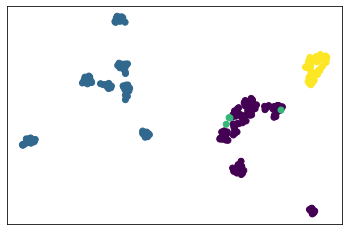

In [6]:
import umap 
viz = umap.UMAP(min_dist=0.4,random_state=25).fit_transform(X_train_scaled)

plt.scatter(viz[:,0],viz[:,1], c=labels)
plt.xticks([])
plt.yticks([])

plt.show()

### Import results, plot values and print predictions statistics

In [7]:
MLR_df = pd.read_excel('../results/kmeans_results.xlsx',sheet_name='Sheet1')

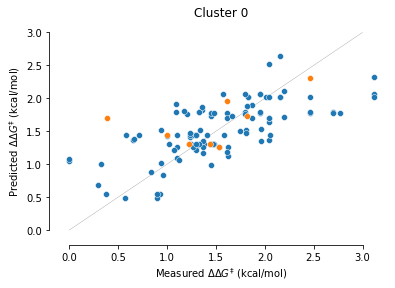

Cluster 0 R2 0.4725714103930587
Cluster 0 MAE 0.35098146222532245


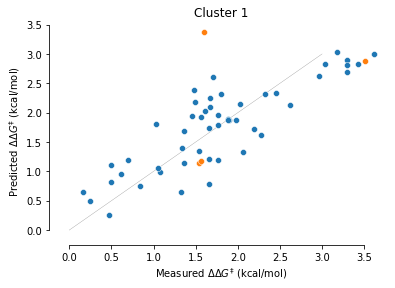

Cluster 1 R2 0.7133027262764815
Cluster 1 MAE 0.7971855419156


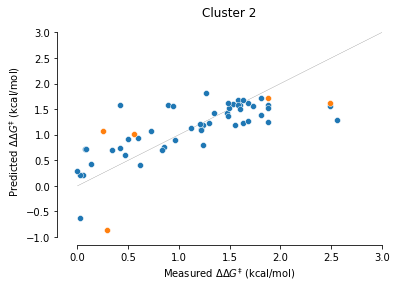

Cluster 2 R2 0.5881342863180858
Cluster 2 MAE 0.6945090530868054


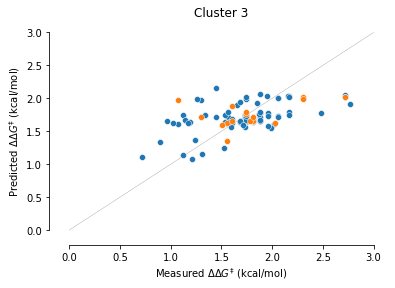

Cluster 3 R2 0.2978232943591942
Cluster 3 MAE 0.25909365439750187


In [5]:
for cluster in MLR_df['Cluster'].unique():
    temp_df = MLR_df[MLR_df['Cluster'] == cluster]

    train_index = temp_df['Class'] == 'Train'
    test_index = temp_df['Class'] == 'Test'

    train = temp_df.loc[train_index,:]
    test = temp_df.loc[test_index,:]

    sns.scatterplot(x=train['Measured ΔΔG'],y=train['Predicted ΔΔG'])
    sns.scatterplot(x=test['Measured ΔΔG'],y=test['Predicted ΔΔG'])

    
    plt.xlabel('Measured $\Delta\Delta G^‡$ (kcal/mol)')
    plt.ylabel('Predicted $\Delta\Delta G^‡$ (kcal/mol)')
    plt.plot([0,3],[0,3],color='grey',zorder=0, linewidth=0.3)
    plt.title('Cluster ' + str(cluster))
    sns.despine(offset=5, trim=True)
    plt.show()

    print("Cluster " + str(cluster) + " R2 " + str(r2_score(train['Measured ΔΔG'],train['Predicted ΔΔG'])))
    print("Cluster " + str(cluster) + " MAE " + str(mean_absolute_error(test['Measured ΔΔG'],test['Predicted ΔΔG'])))


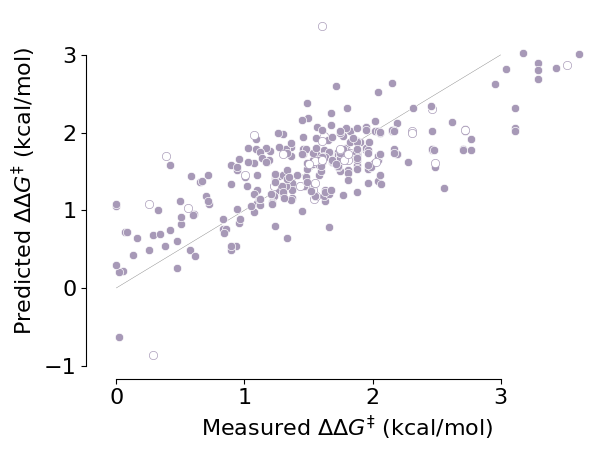

 R2 0.5660945683215655
 MAE 0.41256477579572837


In [31]:
color_list = ['#008580', '#531C93', '#ED9B40', '#BA3B46', '#131200','#A799B7']

for number, cluster in enumerate(MLR_df['Cluster'].unique()):
    temp_df = MLR_df[MLR_df['Cluster'] == cluster]

    train_index = temp_df['Class'] == 'Train'
    test_index = temp_df['Class'] == 'Test'

    train = temp_df.loc[train_index,:]
    test = temp_df.loc[test_index,:]

    sns.scatterplot(x=train['Measured ΔΔG'],y=train['Predicted ΔΔG'], color='#A799B7')
    sns.scatterplot(x=test['Measured ΔΔG'],y=test['Predicted ΔΔG'], color='white',edgecolor='#A799B7')

    
plt.xlabel('Measured $\Delta\Delta G^‡$ (kcal/mol)')
plt.ylabel('Predicted $\Delta\Delta G^‡$ (kcal/mol)')
plt.plot([0,3],[0,3],color='grey',zorder=0, linewidth=0.3)
sns.despine(offset=5, trim=True)
plt.tight_layout()
plt.savefig('fig.pdf')
plt.show()

print(" R2 " + str(r2_score(MLR_df['Measured ΔΔG'],MLR_df['Predicted ΔΔG'])))
print(" MAE " + str(mean_absolute_error(MLR_df[MLR_df['Class'] == 'Test']['Measured ΔΔG'],MLR_df[MLR_df['Class'] == 'Test']['Predicted ΔΔG'])))
